In [1]:
import sys
sys.path.append("/home/gant/Documents/tpcanalysis/python_comp/src")
from openCSV import openCSV
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
import itertools
from scipy import linalg
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
test_csv = openCSV("../converteddata/data2allentries.csv")
test_csv.readCSV()

singular_entry = test_csv.m_data[test_csv.m_data["entry_nr"]==144]

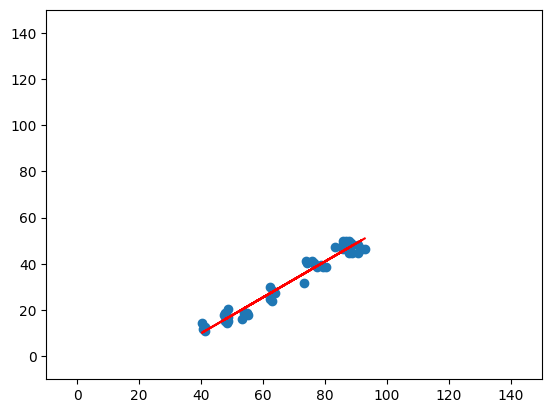

Mean squared error: 7.2590255081741315


In [4]:
x = singular_entry['x'].to_numpy()
y = singular_entry['y'].to_numpy()

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values based on the linear regression model
y_pred = model.predict(x)

# Plot the data and the linear regression line
plt.scatter(x, y)
plt.xlim(-10, 150)
plt.ylim(-10, 150)
plt.plot(x, y_pred, color='red')
plt.show()

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
print('Mean squared error:', mse)

In [6]:
#Essentials
scaler = MinMaxScaler()
fte_colors = {
    -1: "#000000",
    0: "#008fd5",
    1: "#fc4f30",
    2: "#ac434d"
}

In [ ]:
#try using dbscan and optics

features = singular_entry[['x', 'y']].to_numpy()
scaled_features = scaler.fit_transform(features)
#scaled_features=features


dbscan = DBSCAN(eps=0.3, min_samples = int(features[:, 0].size/3))
optics = OPTICS(min_cluster_size = int(2*features[:, 0].size/3))

dbscan.fit(scaled_features)
optics.fit(scaled_features)



if len(np.unique(dbscan.labels_)) > 1:
    dbscan_silhouette = silhouette_score(
        scaled_features, dbscan.labels_
    ).round(2)
else:
    dbscan_silhouette = 0

if len(np.unique(optics.labels_)) > 1:
    optics_silhouette = silhouette_score(
        scaled_features, optics.labels_
    ).round(2)
else:
    optics_silhouette = 0





fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: DBSCAN and OPTICS", fontsize=16)


# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax1.scatter(features[:, 0], features[:, 1], c=db_colors)
ax1.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
ax1.set_xlim([-10, 150])
ax1.set_ylim([-10, 150])

op_colors = [fte_colors[label] for label in optics.labels_]
ax2.scatter(features[:, 0], features[:, 1], c=op_colors)
ax2.set_title(
    f"OPTICS\nSilhouette: {optics_silhouette}", fontdict={"fontsize": 12}
)
ax2.set_xlim([-10, 150])
ax2.set_ylim([-10, 150])


plt.show()

In [ ]:
#Now try using Gaussian mixture and Baesyan Gaussian mixture

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-10.0, 150.0)
    plt.ylim(-10.0, 150.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


gmm = GaussianMixture(n_components=3, covariance_type="full").fit(features)
plot_results(features, gmm.predict(features), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = BayesianGaussianMixture(n_components=3, covariance_type="full").fit(features)
plot_results(
    features,
    dpgmm.predict(features),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)

plt.show()

In [ ]:
%matplotlib widget


#try for 3d

features3d = singular_entry[['x', 'y', 'z']].to_numpy()
scaled_features3d = scaler.fit_transform(features)
#scaled_features=features


dbscan3d = DBSCAN(eps=0.3, min_samples = 10)
optics3d = OPTICS(min_cluster_size = int(2 * features[:, 0].size/3))

dbscan3d.fit(scaled_features)
optics3d.fit(scaled_features)



if len(np.unique(dbscan3d.labels_)) > 1:
    dbscan3d_silhouette = silhouette_score(
        scaled_features3d, dbscan3d.labels_
    ).round(2)
else:
    dbscan3d_silhouette = 0

if len(np.unique(optics3d.labels_)) > 1:
    optics3d_silhouette = silhouette_score(
        scaled_features3d, optics3d.labels_
    ).round(2)
else:
    optics3d_silhouette = 0



print(dbscan3d_silhouette)
print(optics3d_silhouette)



fig3ddb = plt.figure()


ax3d = fig3ddb.add_subplot(1, 2, 1, projection='3d')
db_colors3d = [fte_colors[label] for label in dbscan3d.labels_]
ax3d.scatter(features3d[:, 0], features3d[:, 1], features3d[:, 2], c=db_colors3d, marker='o')
ax3d.set_title(
    f"DBSCAN\nSilhouette: {dbscan3d_silhouette}", fontdict={"fontsize": 12}
)
ax3d.set_xlim([-10, 150])
ax3d.set_ylim([-10, 150])



ax3d = fig3ddb.add_subplot(1, 2, 2, projection='3d')
op_colors3d = [fte_colors[label] for label in optics3d.labels_]
ax3d.scatter(features3d[:, 0], features3d[:, 1], features3d[:, 2], c=op_colors3d, marker='o')
ax3d.set_title(
    f"OPTICS\nSilhouette: {optics3d_silhouette}", fontdict={"fontsize": 12}
)

ax3d.set_xlim([-10, 150])
ax3d.set_ylim([-10, 150])











plt.show()

0.9615655078237373


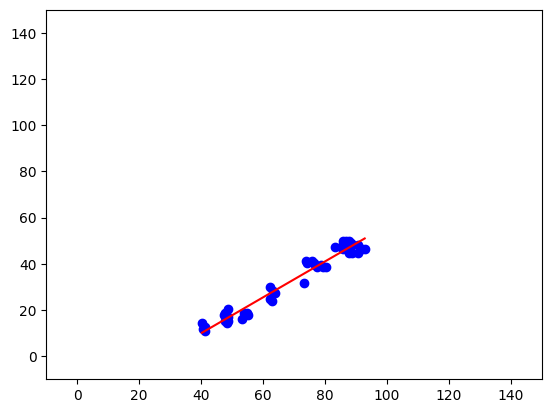

In [20]:
features = singular_entry[['x', 'y']].to_numpy()
x = features[:, 0].reshape(-1, 1)
y = features[:, 1]


reg = RANSACRegressor(random_state=0).fit(x, y)
print(reg.score(x, y))

slope = reg.estimator_.coef_[0]
intercept = reg.estimator_.intercept_


x = np.array([np.min(x), np.max(x)])
y = slope * x + intercept


# Plot the data points
plt.scatter(features[:, 0], features[:, 1], color='blue', label='Data points')

# Plot the fitted line
plt.plot(x, y, color='red', label='Fitted line')

plt.xlim(-10.0, 150.0)
plt.ylim(-10.0, 150.0)

# Show the plot
plt.show()

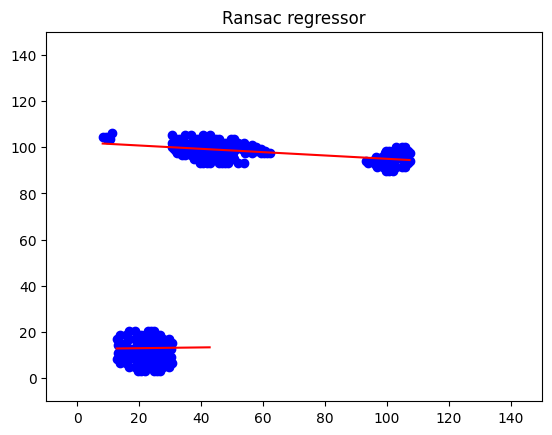

In [5]:
features = singular_entry[['x', 'y']].to_numpy()


n = 2

inliers = np.empty(n, dtype=object)

x = np.empty(n, dtype=object)
y = np.empty(n, dtype=object)

#Set the inlier array to 0 because we always care about the outliers, meaning the we set everything to outliers at first
inliers[0] = np.zeros(len(features), dtype=bool)



all_inliers = np.zeros(features.shape[0], dtype=bool)
for i in range(n):
    # Break if there are no more outliers.
    if np.all(all_inliers):
        print("There are no outliers at i = ", i)
        break

    # Exclude the inliers from all previous iterations.
    current_outliers = np.logical_not(all_inliers)

    # Fit a line to the current outliers
    reg = RANSACRegressor(random_state=56).fit(features[current_outliers][:, 0].reshape(-1, 1), features[current_outliers][:, 1])
    
    # Get the slope and intercept of the fitted line.
    slope = reg.estimator_.coef_[0]
    intercept = reg.estimator_.intercept_
    
    # Get the x and y values for the line.
    x[i] = np.array([np.min(features[current_outliers][:, 0]), np.max(features[current_outliers][:, 0])])
    y[i] = slope * x[i] + intercept
    
    #Calculate the outliers.
    if i != n-1:
        #Initiate everything as outliers.
        next_inliers = np.zeros(features.shape[0], dtype=bool)

        #Only select the points which are outliers in the current iteration 'i' which have been used by RANSACRegressor.
        #The reg.inlier_mask_ only returs the mask for the points used by RANSACRegressor so we must make sure to only select them.
        next_inliers[current_outliers] = reg.inlier_mask_

        # Update all_inliers with the inliers from this iteration.
        all_inliers = np.logical_or(all_inliers, next_inliers)



# Plot the data points
plt.scatter(features[:, 0], features[:, 1], color='blue', label='Data points')

# Plot the fitted lines
for i in range(n):
    if x[i] is not None and y[i] is not None:
        plt.plot(x[i], y[i], color='red', label='Fitted line {}'.format(i + 1))

plt.xlim(-10.0, 150.0)
plt.ylim(-10.0, 150.0)
plt.title("Ransac regressor")

# Show the plot
plt.show()
